Root Mean square error is 0.0325
The Loss function is 0.0007


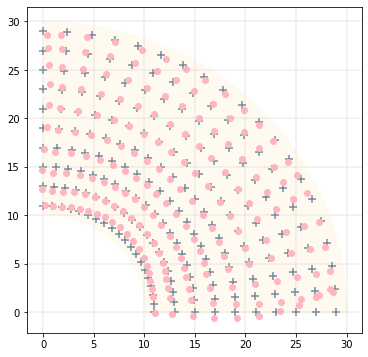

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# Preaper training data (input)
l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))

#circle
l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1+l2)**2-x**2)
f2 = lambda x: np.sqrt(l2**2-x**2)
plt.figure(figsize=(6,6))

x = np.linspace(0, l1+l2, 100)
plt.fill_between(x, f1(x), 0, color='#FFFAF0')
x = np.linspace(0,l2,100)
plt.fill_between(x, f2(x), 0,color='white')

t=np.linspace(0,np.pi/2,20)
l=np.arange(l1-l2+1,l1+l2+1,2)
X = l.reshape(-1,1)@np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1)@np.sin(t.reshape(1,-1))
plt.scatter(X.ravel(),Y.ravel(),marker='+',s=80,color='#778899')
#ravel把向量變矩陣

# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 -l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - \
np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (40, )  #隱藏層
solver = 'lbfgs' # the best for robot data
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = False,
activation = 'logistic', # default activation = ’relu’
tol=1e-6, random_state = 0)
mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
LossFun=mlp_reg.loss_
print('The Loss function is {:.4f}'.format(LossFun))

plt.scatter(x_hat,y_hat,marker='o',color='#FFB6C1')
plt.grid(lw=0.3)

plt.show()




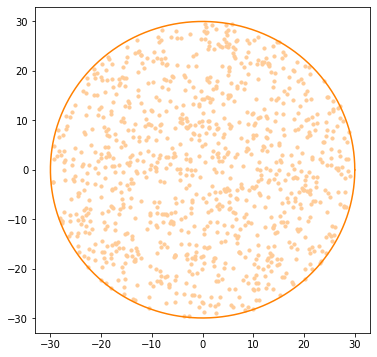

In [22]:
import numpy as np
from scipy.special import gammainc

#circle

radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

p = randsphere(np.array([0, 0]), 30, 1000)
# p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
# d = np.sum(p**2, axis=1)
# p = p[d >= radius_in**2, :] # 扇形內
plt.figure(figsize=(6,6))
plt.scatter(p[:,0],p[:,1],marker='o',s=10, color='#FFCC99')


a, b =0 ,0
r = 30
theta = np.arange(0, 2*np.pi, 0.01)
x1 = a+r*np.cos(theta)
x2 = b+r*np.sin(theta)
# f2 = lambda x: np.sqrt(l2**2-x**2)
# x = np.linspace(0, l1, 100)
plt.plot(x1, x2, color='#FF8000')
plt.show()

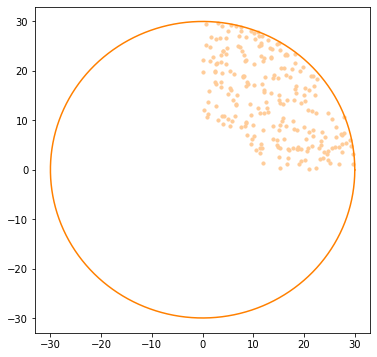

In [5]:
import numpy as np
from scipy.special import gammainc

#circle

radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

p = randsphere(np.array([0, 0]), 30, 1000)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # 扇形內
plt.figure(figsize=(6,6))
plt.scatter(p[:,0],p[:,1],marker='o',s=10, color='#FFCC99')


a, b =0 ,0
r = 30
theta = np.arange(0, 2*np.pi, 0.01)
x1 = a+r*np.cos(theta)
x2 = b+r*np.sin(theta)
# f2 = lambda x: np.sqrt(l2**2-x**2)
# x = np.linspace(0, l1, 100)
plt.plot(x1, x2, color='#FF8000')
plt.show()

438
Trainer(TrainBFGS)
Epoch: 100; Error: 0.13056553512906294;
Epoch: 200; Error: 0.05371977455841205;
Epoch: 300; Error: 0.033130476628245656;
Epoch: 400; Error: 0.024693872383815912;
Epoch: 500; Error: 0.023099002712601496;
The maximum number of train epochs is reached


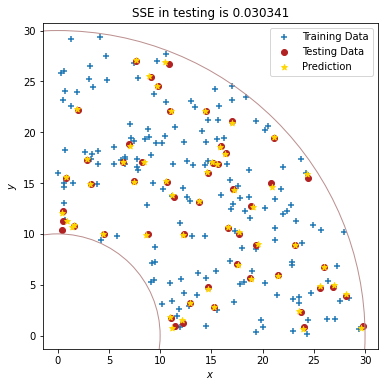

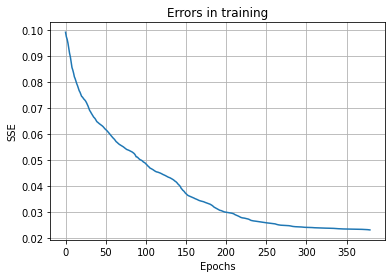

In [13]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from scipy.special import gammainc
from sklearn.model_selection import train_test_split

l1, l2 = 20, 10
n = 1000
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
    
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
print(p.size)
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.25)


theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = '#B22222', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='#BC8F8F'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='#BC8F8F'))        

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 500, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = '#FFD700', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
# print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
# print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.eps", format='eps')
plt.show()


In [ ]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from scipy.special import gammainc
from sklearn.model_selection import train_test_split

l1, l2 = 20, 10
n = 1000
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
    
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
print(p.size)
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.25)


theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = '#B22222', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='#BC8F8F'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='#BC8F8F'))        

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 500, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = '#FFD700', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
# print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
# print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.eps", format='eps')
plt.show()


In [ ]:
import neurolab as nl

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/data1/la_3.txt')

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2]#[hidden layers,output layer]
# set up activation functions for each hidden layer and output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()]
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],
    size = hidden_output_layers, transf = transf)
#set up traning func
net.trainf = nl.train.train_bfgs # the default
# net.trainf = nl.train.train_cg # Newton−CG method
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# start training
err = net.train(InputX, OutputY, epochs = 5000, \
    show = 100, goal = 0.01)

# Calculate fitted or prediction values
OutputY_hat = net.sim(InputX)


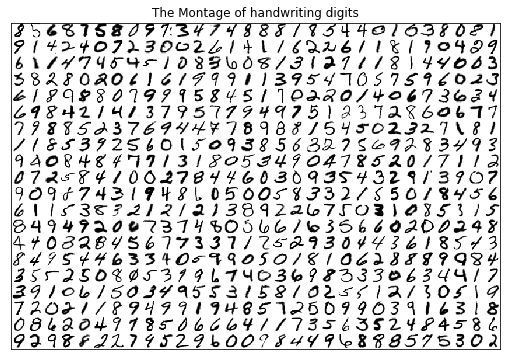

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

data_dir =  '../ANN/'
D = loadmat(data_dir + 'Digits_train.mat')
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9

plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images
n, m = 20, 30 # A n x m montage (total mn images)
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz 一張28x28的小圖
M = np.zeros((m*sz, n*sz)) # montage image
A = X[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
        A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()
# print(D.keys())


# # prepare data
# X_train, X_test, y_train, y_test = \
#     train_test_split(X/255, y.ravel(), test_size = 0.25)
# # setup and run
# hidden_layers = (20,) # one hidden layer 一層30個神經元
# # solver = ’sgd’ # not efficient, need more tuning
# # solver = ’lbfgs’ # not suitable here
# solver = 'adam' # default solver
# clf = MLPClassifier(max_iter = 10000, solver = solver,
#     hidden_layer_sizes = hidden_layers, verbose = False,
#     activation = 'logistic', tol = 1e-6, random_state = 0)
# # default activation = ’relu’
# clf.fit(X_train, y_train)
# y_test_hat = clf.predict(X_test)

# score = clf.score(X_test, y_test)
# # Confusion matrix
# plot_confusion_matrix(clf, X_test, y_test,
#     cmap = plt.cm.Blues, normalize = None) #None變成數字 #true比例
# plt.title('Testing score ={:.2f}%' .format(100*clf.score(X_test, y_test)))
# plt.show()

# # plt.title('Training score ={:.2f}%' .format(100*clf.score(X_test, y_test)))
# plt.plot(clf.loss_curve_)
# plt.title('Training Loss Curve')
# plt.grid()
# plt.show()


458
Trainer(TrainBFGS)
Epoch: 100; Error: 0.06265867590804744;
The goal of learning is reached


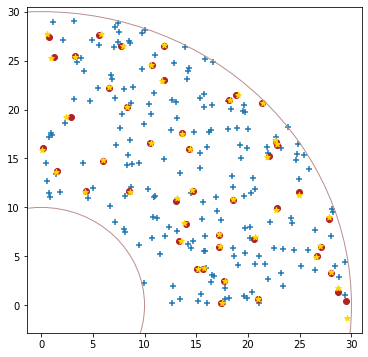

In [4]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from scipy.special import gammainc
from sklearn.model_selection import train_test_split

l1, l2 = 20, 10
n = 1000
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
    
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
print(p.size)
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.2)


theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = '#B22222', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='#BC8F8F'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='#BC8F8F'))        

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [80, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 500, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = '#FFD700', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 



plt.show()


In [ ]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from scipy.special import gammainc
from sklearn.model_selection import train_test_split

l1, l2 = 20, 10
n = 2000
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
    
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
print(p.size)
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.2)


theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = '#B22222', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='#BC8F8F'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='#BC8F8F'))        

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs

print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 500, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 

# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = '#FFD700', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()

theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')

plt.show()


338
Trainer(TrainBFGS)
Epoch: 100; Error: 0.07053989234466063;
Epoch: 200; Error: 0.019805327089793157;


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The goal of learning is reached


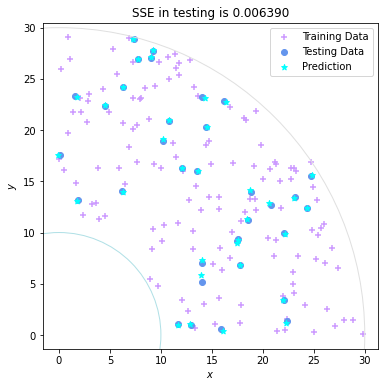

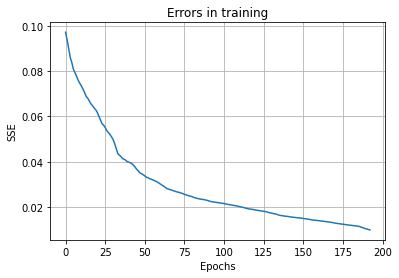

In [4]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from scipy.special import gammainc
from sklearn.model_selection import train_test_split

l1, l2 = 20, 10
n = 800
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
    
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
print(p.size)
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.2)


theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train,color = '#CC99FF', marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = '#6495ED', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='#E0E0E0'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='#E0E0E0'))        

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [30, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 500, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = '#00FFFF', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
# print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
# print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_six\\2000_neu_30.eps', format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_six\\2000_neu_30_err.eps', format='eps')

plt.show()


218
Trainer(TrainBFGS)
Epoch: 100; Error: 0.04709908051785677;
Epoch: 200; Error: 0.013742160359436515;


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The goal of learning is reached


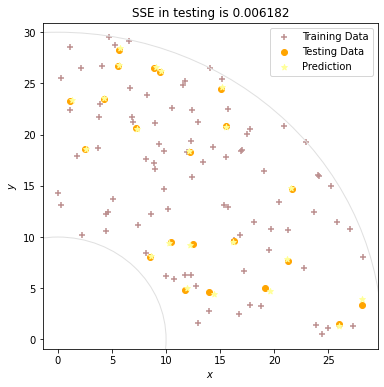

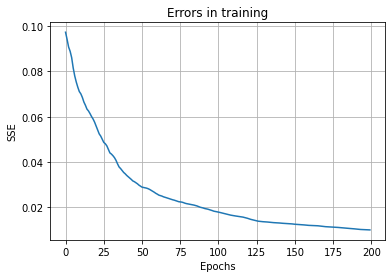

In [4]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from scipy.special import gammainc
from sklearn.model_selection import train_test_split

l1, l2 = 20, 10
n = 500
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
    
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
print(p.size)
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.2)


theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train,color = '#BC8F8F', marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = '#FFA500', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='#E0E0E0'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='#E0E0E0'))        

InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [30, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 500, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = '#FFFF99', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
# print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
# print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_six\\2000_neu_30.eps', format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_six\\2000_neu_30_err.eps', format='eps')

plt.show()
